# Titanic (v1)

__WIP__

- Titanic - Machine Learning from Disaster  
  https://www.kaggle.com/competitions/titanic/data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ydata_profiling import ProfileReport


DF_TRAIN = pd.read_csv('./raw_data/train.csv')
DF_TEST = pd.read_csv('./raw_data/test.csv')
DF_GENDER_SUBMISSION = pd.read_csv('./raw_data/gender_submission.csv')


In [2]:
def _print_df_rows_and_columns(dataset, dataset_name) -> None:
    """Print dataset shape and sample row data."""
    print(dataset_name)
    print(f'shape: {dataset.shape}')
    display(dataset.head(4))


_print_df_rows_and_columns(DF_TRAIN, 'train')
_print_df_rows_and_columns(DF_TEST, 'test')
_print_df_rows_and_columns(DF_GENDER_SUBMISSION, 'gender_submission')

train
shape: (891, 12)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S

test
shape: (418, 11)


PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   
3          895       3                  Wirz, Mr. Albert    male  27.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
3      0  315154  8.6625   NaN        S

gender_submission
shape: (418, 2)


PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0

In [3]:
print(f'{DF_TRAIN.info()}\n')
print(f'{DF_TEST.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

In [4]:
# Investigate missing values.
print(f'{DF_TRAIN.isnull().sum()}\n')
print(f'{DF_TEST.isnull().sum()}')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
df_full = pd.concat([
    DF_TRAIN,
    DF_TEST,
], axis=0, sort=False)

print(df_full.shape)
display(df_full.describe())

(1309, 12)


PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200

In [6]:
profile = ProfileReport(DF_TRAIN)

profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
profile

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

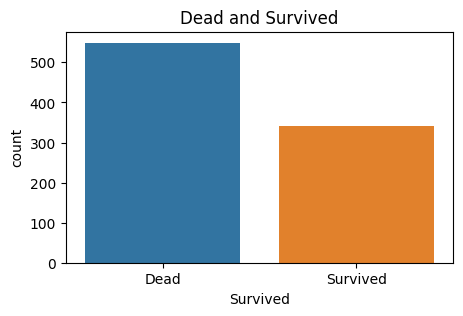

0    549
1    342
Name: Survived, dtype: int64

0    0.6162
1    0.3838
Name: Survived, dtype: float64


In [8]:
train = DF_TRAIN
test = DF_TEST

# Show Dead and Survived.
plt.figure(figsize=(5, 3))
sns.countplot(
    x='Survived',
    data=train
)
plt.title('Dead and Survived')
plt.xticks(
    [0, 1],
    ['Dead', 'Survived']
)
plt.show()

print(train['Survived'].value_counts())

_dead_and_survived_ratio = round(
    train['Survived'].value_counts() / len(train['Survived']),
    4
)
print(f'\n{_dead_and_survived_ratio}')

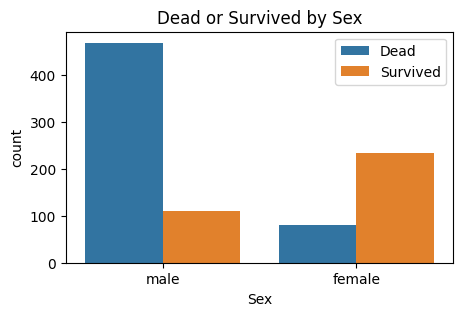

Survived    0    1
Sex               
female     81  233
male      468  109

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908

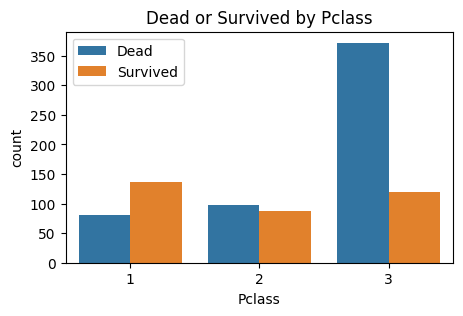

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363

In [9]:
def _plot_survived_graph(item: str) -> None:
    """Plot Survived as bar graph."""
    plt.figure(figsize=(5, 3))
    sns.countplot(
        x=item,
        hue='Survived',
        data=train
    )
    plt.title(f'Dead or Survived by {item}')
    plt.legend(['Dead', 'Survived'])
    plt.show()


def show_cross_tabulation(item: str) -> None:
    """Show Cross tabulation result, Dead or Survived."""
    display(pd.crosstab(
        train[item],
        train['Survived']
    ))
    display(pd.crosstab(
        train[item],
        train['Survived'],
        normalize='index'
    ))

    
_plot_survived_graph('Sex')
show_cross_tabulation('Sex')

_plot_survived_graph('Pclass')
show_cross_tabulation('Pclass')

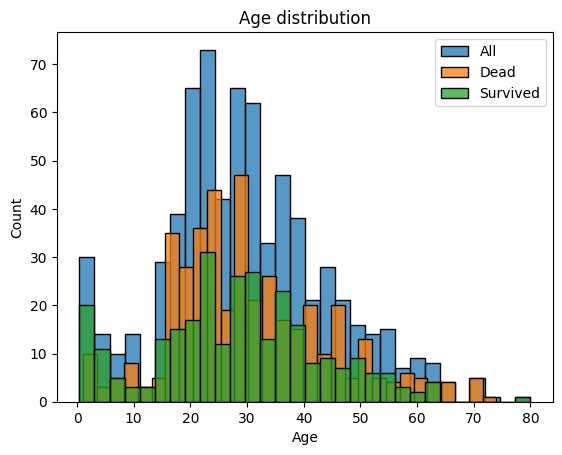

In [10]:
# Show Age distribution.
def _histplot(data, label: str) -> None:
    """Plot histogram"""
    sns.histplot(
        data,
        kde=False,
        bins=30,
        label=label
    )


_histplot(
    train['Age'].dropna(),
    'All'
)
_histplot(
    train[train['Survived'] == 0].Age.dropna(),
    'Dead'
)
_histplot(
    train[train['Survived'] == 1].Age.dropna(),
    'Survived'
)
plt.title('Age distribution')
plt.legend()
plt.show()

In [11]:
# Separate Age by appropriate categories and Cross-tabulate.
train['CategorisedAge'] = pd.cut(train['Age'], 8)

show_cross_tabulation('CategorisedAge')

Survived            0   1
CategorisedAge           
(0.34, 10.368]     26  38
(10.368, 20.315]   71  44
(20.315, 30.263]  146  84
(30.263, 40.21]    86  69
(40.21, 50.158]    53  33
(50.158, 60.105]   25  17
(60.105, 70.052]   13   4
(70.052, 80.0]      4   1

Survived                 0         1
CategorisedAge                      
(0.34, 10.368]    0.406250  0.593750
(10.368, 20.315]  0.617391  0.382609
(20.315, 30.263]  0.634783  0.365217
(30.263, 40.21]   0.554839  0.445161
(40.21, 50.158]   0.616279  0.383721
(50.158, 60.105]  0.595238  0.404762
(60.105, 70.052]  0.764706  0.235294
(70.052, 80.0]    0.800000  0.200000

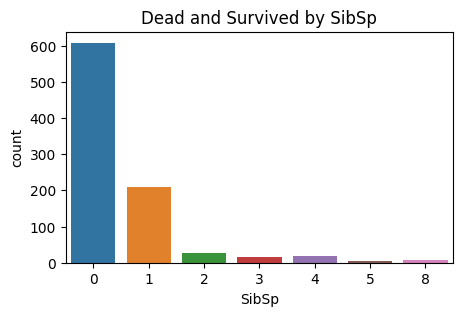

In [12]:
def plot_bar_count_distribution(item: str, dataframe) -> None:
    """Plot bar graph of count distribution."""
    plt.figure(figsize=(5, 3))
    sns.countplot(
        x=item,
        data=dataframe
    )
    plt.title(f'Dead and Survived by {item}')
    plt.show()


# Plot by Number of Siblings or Spouses on board.
plot_bar_count_distribution('SibSp', train)

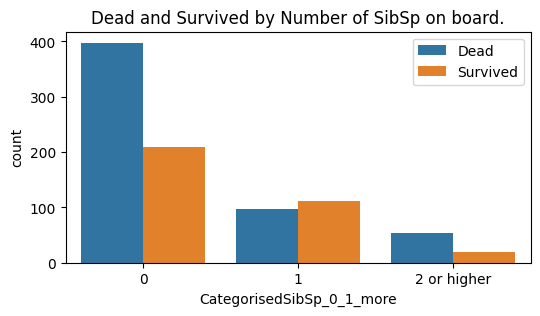

Survived                     0    1
CategorisedSibSp_0_1_more          
0                          398  210
1                           97  112
2                           54   20

Survived                          0         1
CategorisedSibSp_0_1_more                    
0                          0.654605  0.345395
1                          0.464115  0.535885
2                          0.729730  0.270270

In [13]:
def plot_bar_aggregate_distribution(item: str, merged_item: str, dataframe) -> None:
    """Aggregate distribution and plot bar graph."""
    dataframe[merged_item] = [
        i if (i == 0) or (i == 1)
        else 2
        for i in train[item]
    ]

    plt.figure(figsize=(6, 3))
    sns.countplot(
        x=merged_item,
        hue='Survived',
        data=train
    )
    plt.title(f'Dead and Survived by Number of {item} on board.')
    plt.xticks(
        [0, 1, 2],
        ['0', '1', '2 or higher']
    )
    plt.legend(['Dead', 'Survived'])
    plt.show()


# Dead and Survived by Number of Siblings or Spouses on board.
plot_bar_aggregate_distribution(
    'SibSp',
    'CategorisedSibSp_0_1_more',
    train
)
show_cross_tabulation('CategorisedSibSp_0_1_more')

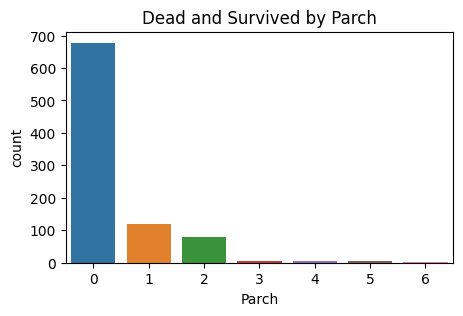

In [14]:
# Plot by Number of Parents or Children on board.
plot_bar_count_distribution('Parch', train)

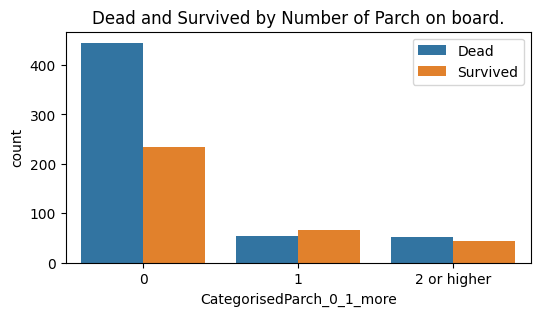

Survived                     0    1
CategorisedParch_0_1_more          
0                          445  233
1                           53   65
2                           51   44

Survived                          0         1
CategorisedParch_0_1_more                    
0                          0.656342  0.343658
1                          0.449153  0.550847
2                          0.536842  0.463158

In [15]:
# Show Dead and Survived by Number of Parents or Children on board.
plot_bar_aggregate_distribution(
    'Parch',
    'CategorisedParch_0_1_more',
    train
)
show_cross_tabulation('CategorisedParch_0_1_more')

The above analysis results confirm the following:
- Many people are on board alone without their family members.
- And that their survival rate tends to be low.

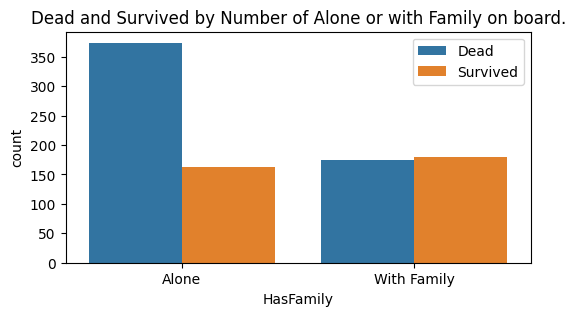

Survived     0    1
HasFamily          
0          374  163
1          175  179

Survived          0         1
HasFamily                    
0          0.696462  0.303538
1          0.494350  0.505650

In [16]:
train['FamilySize'] = 1 + train['SibSp'] + train['Parch']

train['HasFamily'] = 0
train.loc[(train['FamilySize'] > 1), 'HasFamily'] = 1

# Visualize 'Dead and Survived by Number of alone or with family on board.'
plt.figure(figsize=(6, 3))
sns.countplot(
    x='HasFamily',
    hue='Survived',
    data=train
)
plt.title(f'Dead and Survived by Number of Alone or with Family on board.')
plt.xticks(
    [0, 1],
    ['Alone', 'With Family']
)
plt.legend(['Dead', 'Survived'])
plt.show()

show_cross_tabulation('HasFamily')